# Tutorial for Huggingface and description of Dataset

In [1]:
from datasets import load_dataset

In [2]:
# Download Dataset from Huggingface to local specific directory
dataset = load_dataset("Artificio/WikiArt",cache_dir="D:\\MissTiny\\GitHub\\MLProject")

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 103250
    })
})

## Extract Dataset Information

### Features
Original WikiArt dataset contains the following attributes:
- Title (string): the title of the painting
- artist (string): the name of the artist for the painting
- date (string): the published date of the painting
- genre (string in classes): type of content for the painting, such as portraits, landscape, genre painting, abstract, nude painting.
- style (string in classes): artistic style of the painting, such as Impressionism, Romanticism etc.
- description (string): with in the format of "artist/title/style/genre/date"
- filename (string): the filename ending in .jpg
- image (px): the actual image
- embeddings_pca512 (sequence): a list of floats with length 512

In [4]:
dataset['train'].features

{'title': Value(dtype='string', id=None),
 'artist': Value(dtype='string', id=None),
 'date': Value(dtype='string', id=None),
 'genre': Value(dtype='string', id=None),
 'style': Value(dtype='string', id=None),
 'description': Value(dtype='string', id=None),
 'filename': Value(dtype='string', id=None),
 'image': Image(mode=None, decode=True, id=None),
 'embeddings_pca512': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None)}

### Samples
To navigate individual sample:  dataset [split_folder] [idx]

In [5]:
dataset["train"][0]

{'title': 'Cornelia Street',
 'artist': 'John French Sloan',
 'date': '1920',
 'genre': 'cityscape',
 'style': 'New Realism',
 'description': 'John French Sloan / Cornelia Street / New Realism / cityscape / 1920',
 'filename': '0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'embeddings_pca512': [-37.40167999267578,
  -87.52667236328125,
  42.48488235473633,
  -60.555171966552734,
  69.24334716796875,
  64.89490509033203,
  -13.862542152404785,
  -22.90911293029785,
  33.39680480957031,
  4.503255367279053,
  40.05317306518555,
  -21.32126808166504,
  -10.14204216003418,
  -61.7667236328125,
  -8.394667625427246,
  1.3588029146194458,
  46.075408935546875,
  21.551063537597656,
  39.094970703125,
  -37.10438537597656,
  -0.09842237830162048,
  15.846840858459473,
  12.409345626831055,
  21.888248443603516,
  5.111203670501709,
  -17.49536895751953,
  -21.008153915405273,
  49.00922393798828,
  8.426753044128418,
  -20.033618927001953,
  4.31230258941

To navigate the specific feature of individual sample:  dataset [split_folder] [idx] [feature]

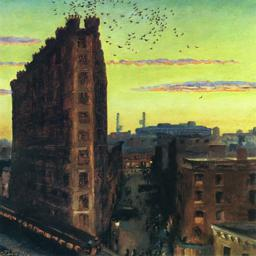

In [12]:
# Extracting Images
dataset["train"][0]["image"]

In [13]:
# Extracting Titles
dataset["train"][0]["title"]

'Cornelia Street'

In [14]:
# Extracting Artist
dataset["train"][0]["artist"]

'John French Sloan'

In [15]:
# Extracting embeddings_pca 512
dataset["train"][0]["embeddings_pca512"]

[-37.40167999267578,
 -87.52667236328125,
 42.48488235473633,
 -60.555171966552734,
 69.24334716796875,
 64.89490509033203,
 -13.862542152404785,
 -22.90911293029785,
 33.39680480957031,
 4.503255367279053,
 40.05317306518555,
 -21.32126808166504,
 -10.14204216003418,
 -61.7667236328125,
 -8.394667625427246,
 1.3588029146194458,
 46.075408935546875,
 21.551063537597656,
 39.094970703125,
 -37.10438537597656,
 -0.09842237830162048,
 15.846840858459473,
 12.409345626831055,
 21.888248443603516,
 5.111203670501709,
 -17.49536895751953,
 -21.008153915405273,
 49.00922393798828,
 8.426753044128418,
 -20.033618927001953,
 4.312302589416504,
 -13.815532684326172,
 -26.18567657470703,
 25.933237075805664,
 -12.01477336883545,
 15.869890213012695,
 -16.279874801635742,
 -8.19188117980957,
 0.0533561185002327,
 -9.626235008239746,
 -5.177135944366455,
 -5.386411666870117,
 13.457709312438965,
 6.353588581085205,
 34.43313980102539,
 -17.420116424560547,
 -2.9093854427337646,
 -16.306747436523438

# Data Cleaning Standard

In [70]:
from datetime import datetime
import re

## Date Cleaning

In [71]:
# First, the date data is important. We will ignore all painting with None date time.
# Other nonsense value are 'rver', 'rain','ific' and '187.0' '198.0' which we believe is wrong. 
def date_remove_none(example):
    date = example['date']
    matched = re.search(r"\d\d\d\d",date)
    if matched:
        return True
    else:
        return False
    

In [72]:
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
notNoneDataset = dataset.filter(date_remove_none)
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2024-11-12 23:57:18


Filter:   0%|          | 0/103250 [00:00<?, ? examples/s]

2024-11-12 23:58:55


In [73]:
notNoneDataset

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 76881
    })
})

In [74]:
# Then, date has different structures. 
# Some is in pure time, such as 1954. 
# Some has c.1968. 
# Some has 1904.0. 
# Some has September 1908
# We need to clean the data all into the format of 1954

def date_format(example):
    date = example['date']
    matched = re.search(r"\d\d\d\d",date)
    try:
        example['date']=date[matched.start():matched.end()]
    except:
        print(f"{example['date']} can not match")
        print(f"{example}")
    return example

In [75]:
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
dateCleanedDataset = notNoneDataset.map(date_format)
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2024-11-12 23:59:08


Map:   0%|          | 0/76881 [00:00<?, ? examples/s]

2024-11-12 23:59:22


In [76]:
dateCleanedDataset

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 76881
    })
})

## Artist Cleaning

In [106]:
# In this dataset, some value in the artist column is actually the title or description of the image, instead of the artists. 
# Here we make an easy cut on any artist names with bracket, comma, numbers, '/', more than four English Words.
# We also rechecked artist that are removed by above criteria and approved real names by creating a list

# Specifically, ' François Leclerc du Tremblay',' François Leclerc du Tremblay (detail)','François Leclerc du Tremblay (detail)' 
# These are considered as the portrait, and the artist is someone else.
def artist_clean(example):
    artist = example['artist']
    meaningful_artists=['Jose Ferraz de Almeida Junior','Maurice Quentin de La Tour','Maria Helena Vieira da Silva','Marevna (Marie Vorobieff)',
                       'Petro Kholodny (Elder)','Louise Elisabeth Vigee Le Brun','António de Carvalho da Silva Porto']
    if artist in meaningful_artists:
        return True
    if re.search(r'\(|\,|\d|\/',artist):
        print(f'{artist} is eliminated')
        return False
    length = len(artist.split(" "))
    if length>4:
        print(f'{artist} is eliminated')
        return False
    return True

In [115]:
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
artistAndDateCleanedDataset = dateCleanedDataset.filter(artist_clean)
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2024-11-13 00:57:16
2024-11-13 00:57:16


In [108]:
artistAndDateCleanedDataset

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 76706
    })
})

In [109]:
new_dataset = artistAndDateCleanedDataset

# New Dataset Statistics

In [112]:
import numpy as np

There are **76706** samples in this dataset. Following are the attributes 
- **Title (string)**: the title of the painting
- **artist (string)**: the name of the artist for the painting. Only two has special characters "Marevna (Marie Vorobieff)" and "Petro Kholodny (Elder)"
- **date (string)**: the published date of the painting in the format of year, e.g. 1950.
- **genre (string in classes)**: type of content for the painting. In total 42 unique categories, from large proportion to smaller proportion, such as portrait (13027), landscape(11453) ... None(735)...calligraphy(12),shan shui(10)
- **style (string in classes)**: artistic style of the painting. In total 133 unique categories,such as Impressionism(8271),Realism(8167) ...None(468)...Kinetic Art(2), Renaissance(1). Notethat some big categories should be able to merge, however, since we don't care about styles that much, we didn't merge them together.
- **description (string)**: with in the format of "artist/title/style/genre/date"
- **filename (string)**: the filename ending in .jpg
- **image (px)**: the actual image
- **embeddings_pca512 (sequence)**: a list of floats with length 512

In [110]:
new_dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 76706
    })
})

## Genre

In [134]:
unique_genre,unique_counts = np.unique(new_dataset['train']['genre'], return_counts=True)
idxs = np.argsort(unique_counts)[::-1]
len(unique_genre)

42

In [135]:
print(unique_genre[idxs])
print(unique_counts[idxs])

['portrait' 'landscape' 'genre painting' 'abstract' 'religious painting'
 'cityscape' 'still life' 'sketch and study' 'figurative' 'illustration'
 'nude painting (nu)' 'symbolic painting' 'mythological painting'
 'self-portrait' 'marina' 'design' 'flower painting' 'animal painting'
 'allegorical painting' 'None' 'history painting' 'interior'
 'literary painting' 'poster' 'battle painting' 'capriccio' 'veduta'
 'cloudscape' 'tessellation' 'wildlife painting' 'caricature' 'pastorale'
 'yakusha-e' 'advertisement' 'bijinga' 'bird-and-flower painting'
 'miniature' 'vanitas' 'quadratura' 'panorama' 'calligraphy' 'shan shui']
[13027 11453 10725  8103  5800  3593  2535  2430  1720  1719  1693  1682
  1315  1271  1254  1238  1163  1023   762   735   655   515   427   230
   210   185   174   156   155   142   136    92    83    67    59    49
    44    28    21    15    12    10]


## Style

In [136]:
unique_style,unique_style_counts = np.unique(new_dataset['train']['style'], return_counts=True)
style_idxs = np.argsort(unique_style_counts)[::-1]
len(unique_style)

133

In [138]:
print(unique_style[style_idxs])
print(unique_style_counts[style_idxs])

['Impressionism' 'Realism' 'Romanticism' 'Expressionism'
 'Post-Impressionism' 'Baroque' 'Art Nouveau (Modern)' 'Surrealism'
 'Symbolism' 'Rococo' 'Abstract Expressionism' 'Naïve Art (Primitivism)'
 'Northern Renaissance' 'Cubism' 'Neoclassicism'
 'Mannerism (Late Renaissance)' 'Early Renaissance' 'High Renaissance'
 'Art Informel' 'Color Field Painting' 'Abstract Art' 'Magic Realism'
 'Fauvism' 'Academicism' 'Pop Art' 'Lyrical Abstraction' 'Ukiyo-e'
 'Concretism' 'None' 'Op Art' 'Minimalism' 'Pointillism'
 'Neo-Expressionism' 'Tachisme' 'Hard Edge Painting'
 'Ink and wash painting' 'Neo-Romanticism' 'Shin-hanga' 'New Realism'
 'Social Realism' 'Proto Renaissance' 'Luminism' 'Sōsaku hanga'
 'American Realism' 'Futurism' 'Constructivism' 'Orientalism' 'Art Deco'
 'Classicism' 'Regionalism' 'Precisionism' 'Dada' 'Orphism' 'Cloisonnism'
 'Tenebrism' 'Synthetic Cubism' 'Tonalism' 'Metaphysical art'
 'Post-Painterly Abstraction' 'Neoplasticism' 'Contemporary Realism'
 'Muralism' 'Naturalism

# Upload Dataset

In [141]:
from huggingface_hub import login

In [144]:
# This is the login session, please use your own token.
login(token="xxx")

In [145]:
new_dataset.push_to_hub("MissTiny/WikiArt")

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/25569 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/256 [00:00<?, ?ba/s]

Map:   0%|          | 0/25569 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/256 [00:00<?, ?ba/s]

Map:   0%|          | 0/25568 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/256 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/MissTiny/WikiArt/commit/bfd921124ca2a7c39ee326606f87c848beb4b5f8', commit_message='Upload dataset', commit_description='', oid='bfd921124ca2a7c39ee326606f87c848beb4b5f8', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/MissTiny/WikiArt', endpoint='https://huggingface.co', repo_type='dataset', repo_id='MissTiny/WikiArt'), pr_revision=None, pr_num=None)

# Load Dataset From My Repository

In [146]:
# Please modify where you want to save the dataset
cleaned_dataset = load_dataset("MissTiny/WikiArt",cache_dir="D:\\MissTiny\\GitHub\\MLProject")

README.md:   0%|          | 0.00/597 [00:00<?, ?B/s]

C:\Users\MissTiny\anaconda3\envs\ML\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MissTiny\.cache\huggingface\hub\datasets--MissTiny--WikiArt. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00003.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/76706 [00:00<?, ? examples/s]

In [147]:
cleaned_dataset 

DatasetDict({
    train: Dataset({
        features: ['title', 'artist', 'date', 'genre', 'style', 'description', 'filename', 'image', 'embeddings_pca512'],
        num_rows: 76706
    })
})

1. Label -> Numeric -> Normalize
    200040005000 -> Limit reasonable
2. Label -> Text

1. Embedding
2. 